In [1]:
#inspect_rtf_sim.ipynb
#
#Copyright (c) 2019, Joe Hahn
#
#by Joe Hahn
#joe.hahn@oracle.com
#12 October 2018
#
#inspect output of the RTF simulation

In [2]:
#import python & helper_fns used below
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)    #tell pandas to display all columns

In [3]:
#import plotting libraries
#use following line when in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(font_scale=1.5, font='DejaVu Sans')

In [4]:
#read input parameters
inputs_path = 'inputs_rtf.py'
execfile(inputs_path)
print 'inputs_path = ', inputs_path
print 'debug = ', debug
print 'N_devices = ', N_devices
print 'sensor_sigma = ', sensor_sigma
print 'N_timesteps = ', N_timesteps
print 'time_start = ', time_start
print 'output_interval = ', output_interval
print 'strategy = ', strategy
print 'pdm_threshold_time = ', pdm_threshold_time
print 'pdm_threshold_probability = ', pdm_threshold_probability
print 'pdm_skip_time = ', pdm_skip_time
print 'N_technicians = ', N_technicians
print 'repair_duration = ', repair_duration
print 'maintenance_duration = ', maintenance_duration
print 'rn_seed = ', rn_seed
print 'issues = ', issues

inputs_path =  inputs_rtf.py
debug =  True
N_devices =  1000
sensor_sigma =  0.01
N_timesteps =  50000
time_start =  0
output_interval =  10
strategy =  rtf
pdm_threshold_time =  400
pdm_threshold_probability =  0.5
pdm_skip_time =  5
N_technicians =  100
repair_duration =  100
maintenance_duration =  25
rn_seed =  17
issues =  {'cracked_valve': {'coefficient': 1e-05, 'fatal': True, 'ID': 2}, 'broken_gear': {'coefficient': 2e-06, 'fatal': True, 'ID': 3}, 'jammed_rotor': {'coefficient': 8e-05, 'fatal': True, 'ID': 1}, 'crud': {'coefficient': 0.1, 'fatal': False, 'ID': 0}}


In [5]:
#use the prep_rtf_data() helper function to read the telemetry data & the repairs data as pandas dataframes,
#and then join these two dataframes to produce the records dataframe
time_bucket_size = 20
telemetry_file = 'data/telemetry_rtf.csv.gz'
repairs_file = 'data/repairs_rtf.csv.gz'
from helper_fns import * 
telemetry, repairs, records = prep_rtf_data(time_bucket_size, issues, telemetry_file, repairs_file)
print records.dtypes
print 'telemetry.shape = ', telemetry.shape
print 'repairs.shape = ', repairs.shape
print 'records.shape = ', records.shape
records.head()

reading data/telemetry_rtf.csv.gz ...
pivoting telemetry...
reading data/repairs_rtf.csv.gz ...
merging telemetry and repairs...
issue_names =  ['cracked_valve', 'broken_gear', 'jammed_rotor']
computing time to next issue...
computing time since previous issue...
deviceID                      int64
time_bucket                   int64
time                          int64
load                        float64
pressure                    float64
temperature                 float64
production_rate             float64
technicianID                  int64
issue                        object
production_rate_fail        float64
temperature_fail            float64
pressure_fail               float64
load_fail                   float64
time_til_cracked_valve       object
time_til_broken_gear         object
time_til_jammed_rotor        object
time_since_cracked_valve     object
time_since_broken_gear       object
time_since_jammed_rotor      object
dtype: object
telemetry.shape =  (27522320, 5)
repai

,deviceID,time_bucket,time,load,pressure,temperature,production_rate,technicianID,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail,time_til_cracked_valve,time_til_broken_gear,time_til_jammed_rotor,time_since_cracked_valve,time_since_broken_gear,time_since_jammed_rotor
0,0,0,0,0.003613,-0.036010,-0.012448,0.996216,-1,none,NaN,NaN,NaN,NaN,3280,2140,5780,NaN,NaN,NaN
1,0,1,20,-0.040768,-0.027691,-0.019381,0.993463,-1,none,NaN,NaN,NaN,NaN,3260,2120,5760,NaN,NaN,NaN
2,0,2,40,-0.093661,0.007987,-0.001656,0.990108,-1,none,NaN,NaN,NaN,NaN,3240,2100,5740,NaN,NaN,NaN
3,0,3,60,-0.108717,0.006700,0.012203,0.987759,-1,none,NaN,NaN,NaN,NaN,3220,2080,5720,NaN,NaN,NaN
4,0,4,80,-0.097089,-0.059043,0.027068,0.988276,-1,none,NaN,NaN,NaN,NaN,3200,2060,5700,NaN,NaN,NaN


In [6]:
#generate a list of fatal issues
print 'issues = ', issues
fatal_issues = [issue_name for issue_name, d in issues.iteritems() if (d['fatal'] == True)]
print 'fatal_issues = ', fatal_issues

issues =  {'cracked_valve': {'coefficient': 1e-05, 'fatal': True, 'ID': 2}, 'broken_gear': {'coefficient': 2e-06, 'fatal': True, 'ID': 3}, 'jammed_rotor': {'coefficient': 8e-05, 'fatal': True, 'ID': 1}, 'crud': {'coefficient': 0.1, 'fatal': False, 'ID': 0}}
fatal_issues =  ['cracked_valve', 'broken_gear', 'jammed_rotor']


In [7]:
#show telemetry records
telemetry.tail(10)

,time,deviceID,sensor,value,time_bucket
27522310,49999,959,production_rate,0.924963,2499
27522311,49999,961,load,0.946637,2499
27522312,49999,961,production_rate,0.895139,2499
27522313,49999,976,load,-0.074713,2499
27522314,49999,976,production_rate,0.979728,2499
27522315,49999,-1,N_technicians,92.000000,2499
27522316,49999,-1,N_operating,908.000000,2499
27522317,49999,-1,N_failed,0.000000,2499
27522318,49999,-1,N_repair,92.000000,2499
27522319,49999,-1,N_maintenance,0.000000,2499


In [8]:
#show repairs records
repairs.head()

,time_bucket,deviceID,technicianID,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail
0,7,46,29,jammed_rotor,0.975915,-0.023391,-0.227939,-0.074207
1,7,941,77,jammed_rotor,0.978877,0.073195,0.179420,-0.084087
2,8,882,33,broken_gear,0.949353,-0.427060,0.023747,0.271239
3,8,538,39,jammed_rotor,0.966457,0.295983,0.040291,-0.152585
4,8,640,57,jammed_rotor,0.967136,0.271712,-0.062418,-0.174010


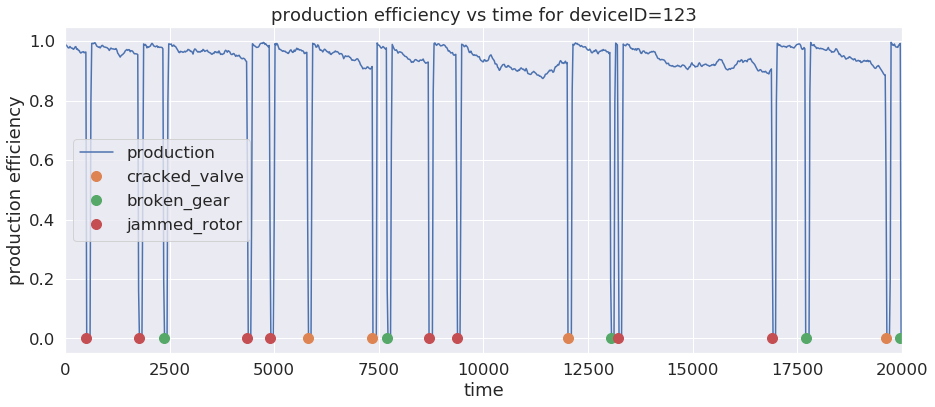

In [9]:
#plot production_rate vs time for deviceID=0
deviceID = 123
df = records
df = df[df.deviceID == deviceID]
xp = df.time
yp = df.production_rate
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.plot(xp, yp, linestyle='-', label='production')
for issue in fatal_issues:
    dfs = df[df.issue == issue]
    if (len(dfs) > 0):
        xp = dfs.time
        yp = dfs.production_rate*0
        p = ax.plot(xp, yp, linestyle='none', marker='o', markersize=10, label=issue)
p = ax.set_title('production efficiency vs time for deviceID=' + str(deviceID))
p = ax.set_xlabel('time')
p = ax.set_ylabel('production efficiency')
p = ax.set_xlim(0, 20000)
leg = ax.legend(loc='center left')
plt.savefig('figs/production.png') 

In [10]:
#get list of deviceIDs
df = records
deviceIDs = df.deviceID.unique().tolist()

In [11]:
#list issues & their frequency
df = records
N = df.groupby('issue')['time'].count().sort_values(ascending=False)
print N
issues = N.index.tolist()
issues.remove('none')
print 'issues = ', issues
N_issues = N[issues].sum()
print 'N_issues = ', N_issues

issue
none             2460225
jammed_rotor       20682
cracked_valve      11646
broken_gear         7447
Name: time, dtype: int64
issues =  ['jammed_rotor', 'cracked_valve', 'broken_gear']
N_issues =  39775


[218, 223, 271, 355, 393, 404, 474, 843, 924]


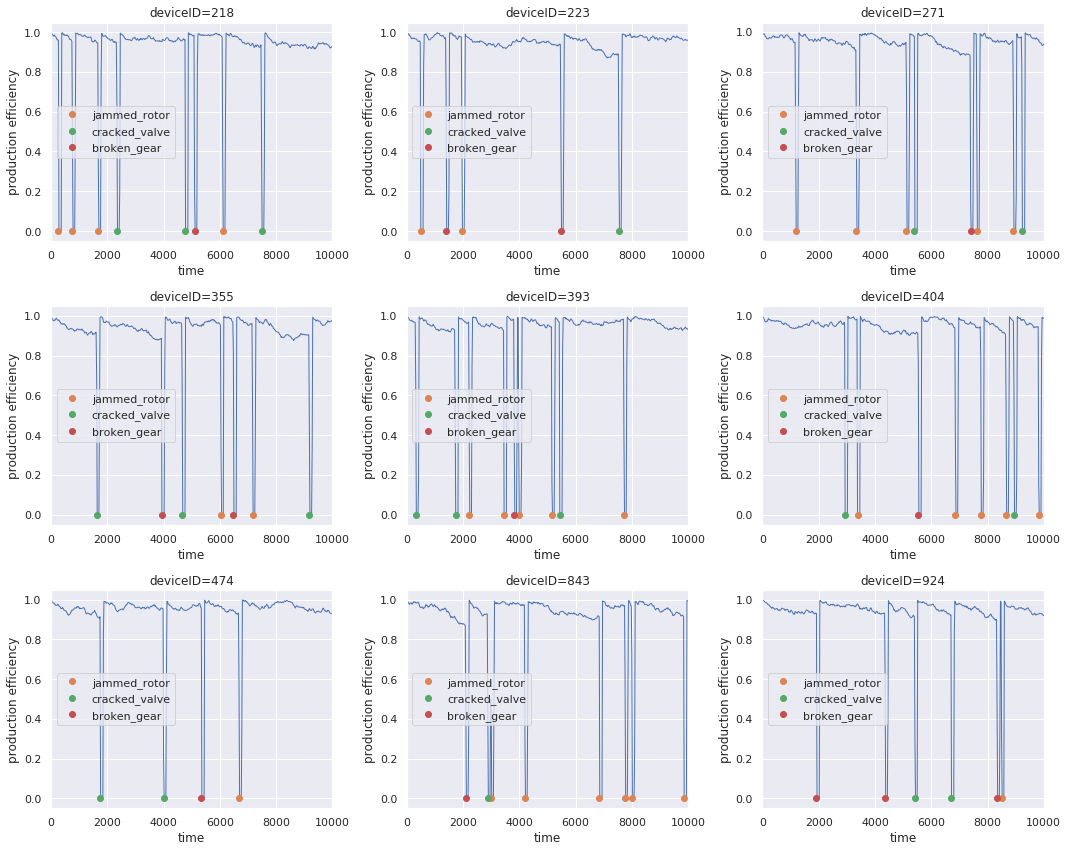

In [12]:
#plot array of production_rates vs time for randomly selected deviceIDs
Nxy = 3
N = Nxy**2
np.random.seed(rn_seed + 3)
random_deviceIDs = np.sort(np.random.choice(deviceIDs, size=N)).tolist()
print random_deviceIDs
sns.set(font_scale=1.0, font='DejaVu Sans')
f, axes = plt.subplots(Nxy, Nxy, figsize=(15, 12))
axes = axes.reshape(N)
for idx in range(N):
    deviceID = random_deviceIDs[idx]
    df = records
    jdx = (df.deviceID == deviceID)
    df = df[jdx]
    xp = df.time
    yp = df.production_rate
    ax = axes[idx]
    p = ax.plot(xp, yp, linewidth=1, linestyle='-', label='')
    for issue in issues:
        dfs = df[df.issue == issue]
        if (len(dfs) > 0):
            xp = dfs.time
            yp = dfs.production_rate*0
            p = ax.plot(xp, yp, linestyle='none', marker='o', markersize=6, label=issue)
    p = ax.set_title('deviceID=' + str(deviceID))
    p = ax.set_xlabel('time')
    p = ax.set_ylabel('production efficiency')
    if (xp.max() > 10000):
        p = ax.set_xlim(0, 10000)
    leg = ax.legend(loc='center left')
plt.tight_layout()
plt.savefig('figs/3x3_production.png') 

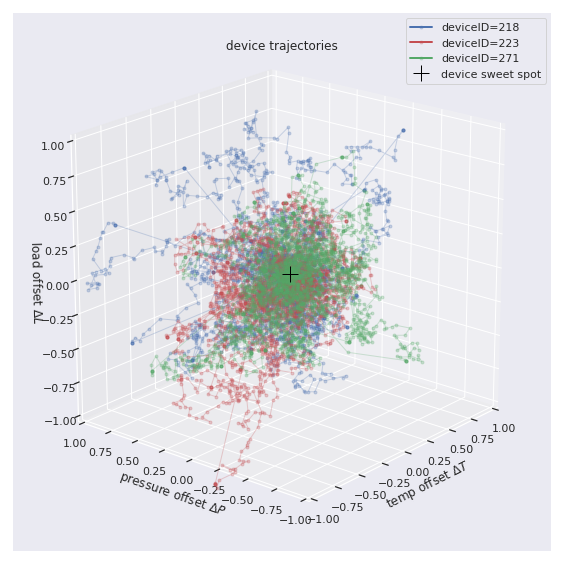

In [13]:
#3D plot of deviceIDs' random walks
sns.set(font_scale=1.0, font='DejaVu Sans')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
clrs = ["#4c72b0",  "#c44e52", "#55a868"]
for idx in range(3):
    deviceID = random_deviceIDs[idx]
    df = records
    jidx = (df.deviceID == deviceID)
    df = df[jidx].copy().sort_values('time')
    xp = df.temperature
    yp = df.pressure
    zp = df.load
    ax.plot(xp, yp, zp, linestyle='-', marker='o', markersize=3, label='deviceID='+str(deviceID), linewidth=1,
        alpha=0.25, color=clrs[idx])
p = ax.plot([0], [0], marker='+', markersize=16, color='black', mew=1, label='device sweet spot', linestyle='none')
p = ax.set_title('device trajectories')
p = ax.set_xlabel(r'temp offset $\Delta T$')
p = ax.set_ylabel(r'pressure offset $\Delta P$')
p = ax.set_zlabel(r'load offset $\Delta L$')
rng = (-1.0, 1.0)
p = ax.set_xlim(1.0, -1.0)
p = ax.set_ylim(1.0, -1.0)
p = ax.set_zlim(-1.0, 1.0)
leg = ax.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1.0)
    lh.set_linewidth(2.0)
ax.view_init(20, 40)
plt.tight_layout()
plt.savefig('figs/random_walk.png', dpi=300) 

In [14]:
#compute avg production_rate (aka production efficiency) vs time
production_rate_avg = records.groupby('time')['production_rate'].mean()
idx = (production_rate_avg.index > production_rate_avg.index.values.max()/2)
mean_production_rate_avg = production_rate_avg[idx].mean()
print 'mean_production_rate_avg = ', mean_production_rate_avg
idx = (records.production_rate > 0.5)
pr = records[idx].production_rate.mean()
print 'pr = ', pr
max_production_rate = pr - (N_issues*maintenance_duration)*1.0/(N_devices*N_timesteps)
print 'max_production_rate = ', max_production_rate

mean_production_rate_avg =  0.875751997781
pr =  0.951976472165
max_production_rate =  0.9320889721653236


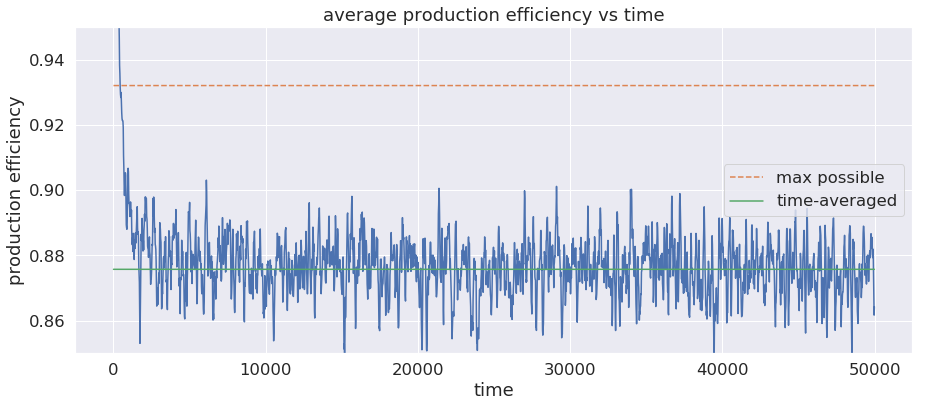

In [15]:
#plot avg production_rate vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
yp = production_rate_avg
p = ax.plot(yp, linestyle='-', label = '')
yp = yp*0 + max_production_rate
p = ax.plot(yp, linestyle='dashed', label = 'max possible')
yp = yp*0 + mean_production_rate_avg
p = ax.plot(yp, linestyle='-', label = 'time-averaged')
p = ax.set_title('average production efficiency vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('production efficiency')
p = ax.legend()
p = ax.set_ylim(0.85, 0.95)
plt.savefig('figs/avg_production.png') 

In [16]:
#fraction of technicians utilized
df = telemetry
technician_fraction = df[df.sensor == 'N_technicians'][['time', 'value']]
technician_fraction['technician_fraction'] = technician_fraction.value/N_technicians
idx = (technician_fraction.time > N_timesteps/2)
technician_fraction_mean = technician_fraction[idx].technician_fraction.mean()
technician_fraction_std = technician_fraction[idx].technician_fraction.std()
print 'technician_fraction_mean = ', technician_fraction_mean
print 'technician_fraction_std = ', technician_fraction_std
technician_fraction.tail()

technician_fraction_mean =  0.815903836153
technician_fraction_std =  0.0848096546809


,time,value,technician_fraction
27519975,49995,93.0,0.93
27520588,49996,92.0,0.92
27521161,49997,93.0,0.93
27521724,49998,92.0,0.92
27522315,49999,92.0,0.92


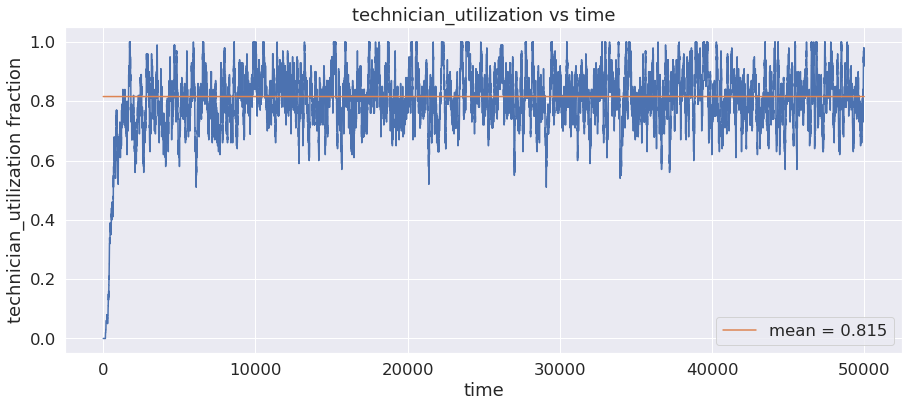

In [17]:
#plot technician_utilization vs time
xp = technician_fraction.time
yp = technician_fraction.technician_fraction
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.plot(xp, yp, linestyle='-', label='')
yp = yp*0 + technician_fraction_mean
p = ax.plot(xp, yp, linestyle='-', label='mean = ' + str(technician_fraction_mean)[0:5])
p = ax.set_title('technician_utilization vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('technician_utilization fraction')
p = ax.legend()
plt.savefig('figs/avg_tech_utilization.png') 

In [18]:
#device utilization fraction = fraction of wells that are operating, failed, or being repaired
df = telemetry
print df.sensor.unique()
operating_fraction = df[df.sensor == 'N_operating'][['time', 'value']]
operating_fraction['device_fraction'] = operating_fraction.value/N_devices
failed_fraction = df[df.sensor == 'N_failed'][['time', 'value']]
failed_fraction['device_fraction'] = failed_fraction.value/N_devices
repair_fraction = df[df.sensor == 'N_repair'][['time', 'value']]
repair_fraction['device_fraction'] = repair_fraction.value/N_devices
maintenance_fraction = df[df.sensor == 'N_maintenance'][['time', 'value']]
maintenance_fraction['device_fraction'] = maintenance_fraction.value/N_devices
operating_fraction.tail()

['N_technicians' 'N_operating' 'N_failed' 'N_repair' 'N_maintenance'
 'temperature' 'production_rate' 'pressure' 'load']


,time,value,device_fraction
27519976,49995,907.0,0.907
27520589,49996,908.0,0.908
27521162,49997,907.0,0.907
27521725,49998,908.0,0.908
27522316,49999,908.0,0.908


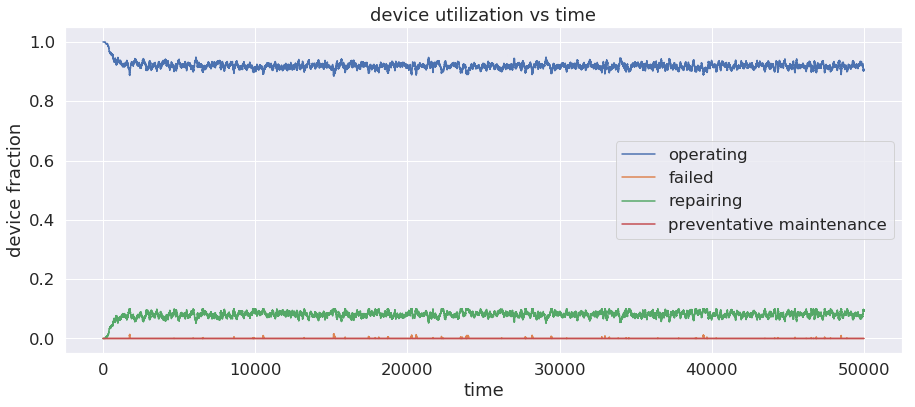

In [19]:
#plot operating_fraction vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = operating_fraction.time
yp = operating_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='operating')
xp = failed_fraction.time
yp = failed_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='failed')
xp = repair_fraction.time
yp = repair_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='repairing')
xp = maintenance_fraction.time
yp = maintenance_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='preventative maintenance')
p = ax.set_title('device utilization vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('device fraction')
p = ax.legend()

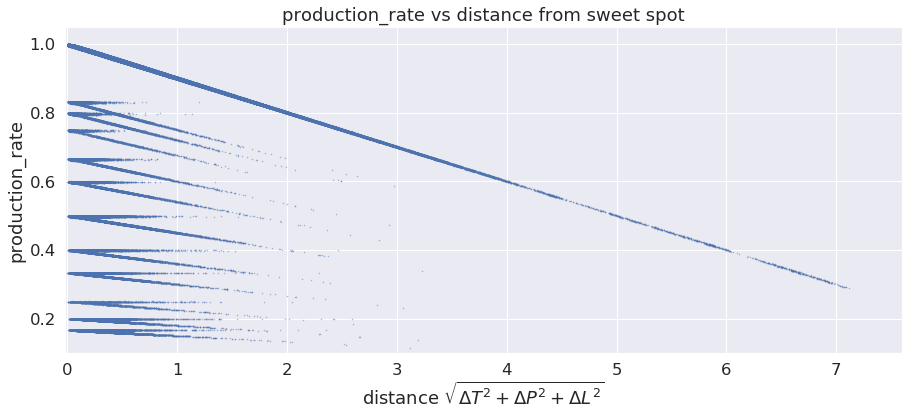

In [20]:
#note that crud increases load
df = records
r = np.sqrt(df.temperature**2 + df.pressure**2 + df.load**2)
idx = (df.production_rate > 0)
xp = r[idx]
yp = df[idx].production_rate
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.plot(xp, yp, marker='.', markersize=1, alpha=0.5, linestyle='none')
p = ax.set_title('production_rate vs distance from sweet spot')
p = ax.set_xlabel(r'distance $\sqrt{\Delta T^2 + \Delta P^2 + \Delta L^2}$')
p = ax.set_ylabel('production_rate')
p = ax.set_xlim(-0.02, 7.6)
p = ax.set_ylim(0.1, 1.05)

time_til_cracked_valve mean =  2958.02310572
time_til_cracked_valve median =  2220.0
time_til_cracked_valve std =  2690.96512915


/Users/jhahn/oracle/Oracle_Content/projects/predictive-maintenance-sim/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


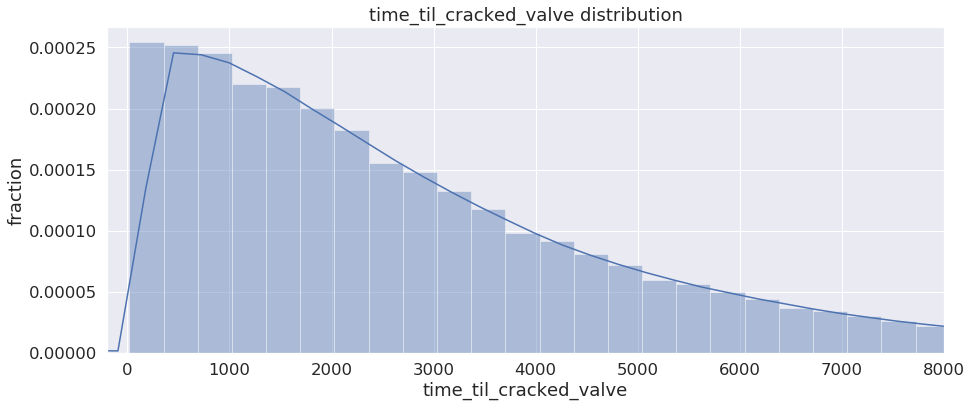

In [21]:
#plot distribution of devices' remaining lifetimes versus cracked_valve
issue = 'cracked_valve'
df = records
df = df[df.issue == 'none']
Nbins = 101
sns.set(font_scale=1.5, font='DejaVu Sans')
y_col = 'time_til_' + issue
y = df[df[y_col] > 0][y_col].astype(int)
print y_col + ' mean = ', y.mean()
print y_col + ' median = ', y.median()
print y_col + ' std = ', y.std()
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = sns.distplot(y, bins=Nbins, ax=ax)
p = ax.set_xlim(-200, 8000)
p = ax.set_title(y_col + ' distribution')
p = ax.set_xlabel(y_col)
p = ax.set_ylabel('fraction')
plt.savefig('figs/cracked_valve_times.png') 

time_til_broken_gear mean =  4154.47982261
time_til_broken_gear median =  3280.0
time_til_broken_gear std =  3581.65668146


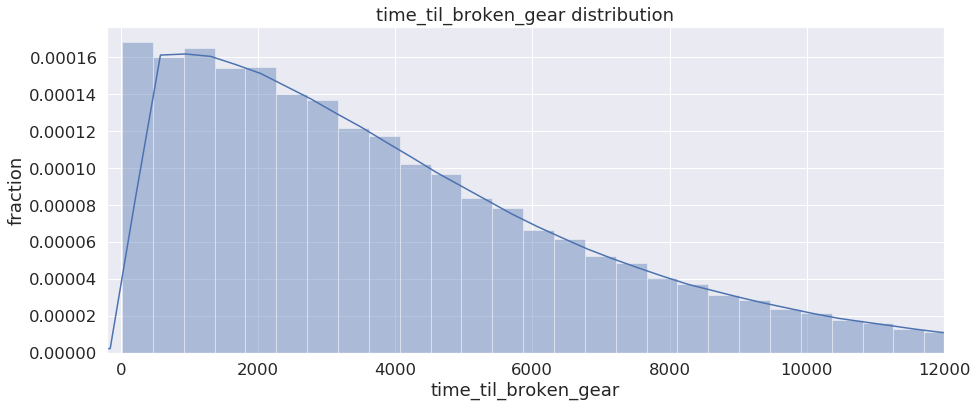

In [22]:
#plot distribution of devices' remaining lifetimes versus broken_gear
issue = 'broken_gear'
df = records
df = df[df.issue == 'none']
Nbins = 101
sns.set(font_scale=1.5, font='DejaVu Sans')
y_col = 'time_til_' + issue
y = df[df[y_col] > 0][y_col].astype(int)
print y_col + ' mean = ', y.mean()
print y_col + ' median = ', y.median()
print y_col + ' std = ', y.std()
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = sns.distplot(y, bins=Nbins, ax=ax)
p = ax.set_xlim(-200, 12000)
p = ax.set_title(y_col + ' distribution')
p = ax.set_xlabel(y_col)
p = ax.set_ylabel('fraction')
plt.savefig('figs/broken_gear_times.png') 

time_til_jammed_rotor mean =  2003.48646438
time_til_jammed_rotor median =  1340.0
time_til_jammed_rotor std =  2201.30717242


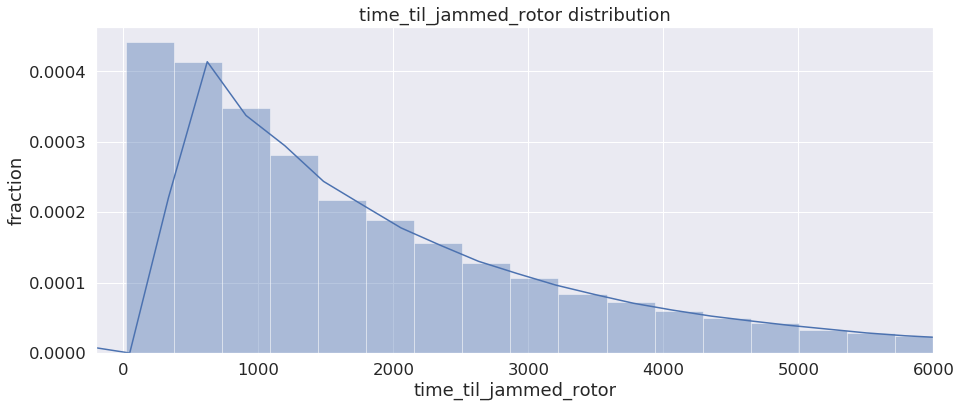

In [23]:
#plot distribution of devices' remaining lifetimes versus jammed_rotor
issue = 'jammed_rotor'
df = records
df = df[df.issue == 'none']
Nbins = 101
sns.set(font_scale=1.5, font='DejaVu Sans')
y_col = 'time_til_' + issue
y = df[df[y_col] > 0][y_col].astype(int)
print y_col + ' mean = ', y.mean()
print y_col + ' median = ', y.median()
print y_col + ' std = ', y.std()
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = sns.distplot(y, bins=Nbins, ax=ax)
p = ax.set_xlim(-200, 6000)
p = ax.set_title(y_col + ' distribution')
p = ax.set_xlabel(y_col)
p = ax.set_ylabel('fraction')
plt.savefig('figs/jammed_rotor_times.png') 

In [24]:
#compute time_til_next_issue
df = records
cols = ['time_til_cracked_valve', 'time_til_broken_gear', 'time_til_jammed_rotor']
df['time_til_issue'] = df.time_til_cracked_valve
for col in cols:
    idx = (df[col] < df.time_til_issue)
    df.loc[idx, 'time_til_issue'] = df.loc[idx, col]
df[cols + ['time_til_issue']].head()

,time_til_cracked_valve,time_til_broken_gear,time_til_jammed_rotor,time_til_issue
0,3280,2140,5780,2140
1,3260,2120,5760,2120
2,3240,2100,5740,2100
3,3220,2080,5720,2080
4,3200,2060,5700,2060


mean time_til_issue =  1089.03231123
median time_til_issue =  720.0
std time_til_issue =  1399.40416972


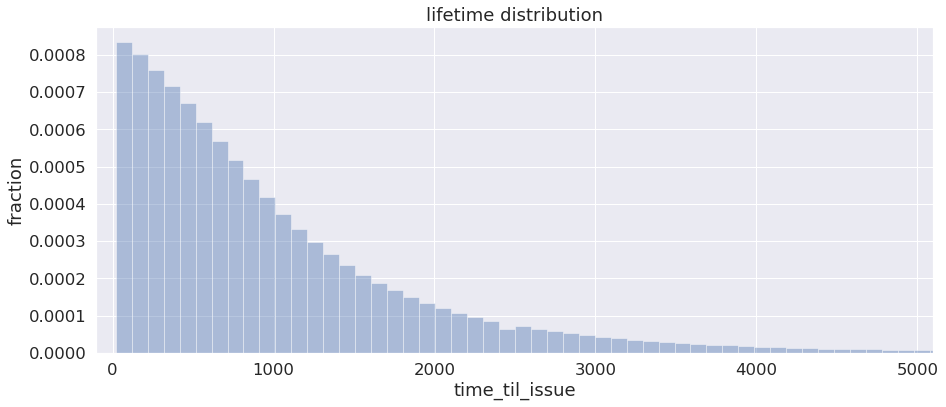

In [25]:
#plot distribution of devices' remaining lifetimes vs all issues
df = records
df = df[df.time_til_issue > 0]
Nbins = 341
sns.set(font_scale=1.5, font='DejaVu Sans')
y = (df.time_til_issue).astype(int)
print 'mean time_til_issue = ', y.mean()
print 'median time_til_issue = ', y.median()
print 'std time_til_issue = ', y.std()
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = sns.distplot(y, bins=Nbins, norm_hist=True, kde=False, ax=ax)
p = ax.set_xlim(-100, 5100)
p = ax.set_title('lifetime distribution')
p = ax.set_xlabel('time_til_issue')
p = ax.set_ylabel('fraction')
plt.savefig('figs/issue_times.png')

15% of devices have lifetime <  200


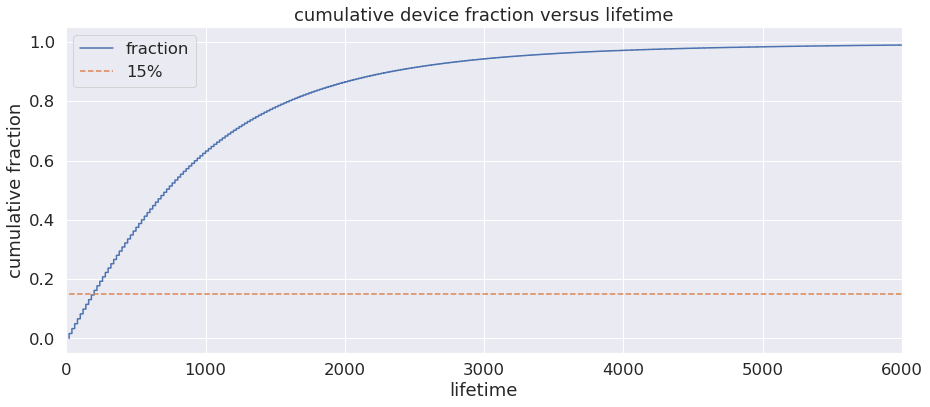

In [26]:
#cumulative distribution of lifetimes
df = pd.DataFrame(y).sort_values('time_til_issue')
df['one'] = 1
df['cs'] = df.one.cumsum()
df.cs = df.cs/df.cs.max()
df.tail()
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = df.time_til_issue
yp = df.cs
p = ax.plot(xp, yp, linestyle='-', label='fraction')
y15 = xp*0 + 0.15
p = ax.plot(xp, y15, linestyle='dashed', label='15%')
p = ax.set_title('cumulative device fraction versus lifetime')
p = ax.set_xlabel('lifetime')
p = ax.set_ylabel('cumulative fraction')
p = ax.set_xlim(-10, 6000)
p = plt.legend()
print '15% of devices have lifetime < ', xp[yp < y15].max()

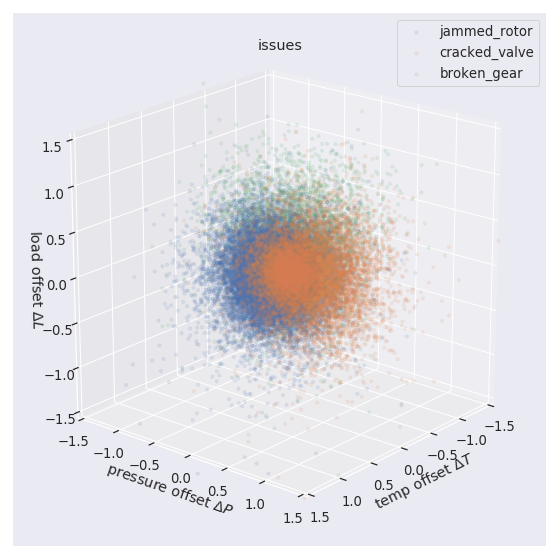

In [27]:
#3D plot of sensors during issues
df = records
sns.set(font_scale=1.2, font='DejaVu Sans')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for issue in issues:
    idx = (df.issue == issue)
    xp = df[idx].temperature
    yp = df[idx].pressure
    zp = df[idx].load
    ax.scatter(xp, yp, zp, s=10, marker='o', label=issue, alpha=0.1)
p = ax.set_title('issues')
p = ax.set_xlabel(r'temp offset $\Delta T$')
p = ax.set_ylabel(r'pressure offset $\Delta P$')
p = ax.set_zlabel(r'load offset $\Delta L$')
p = ax.legend()
p = ax.set_xlim(-1.5, 1.5)
p = ax.set_ylim(-1.5, 1.5)
p = ax.set_zlim(-1.5, 1.5)
ax.view_init(20, 40)
plt.tight_layout()

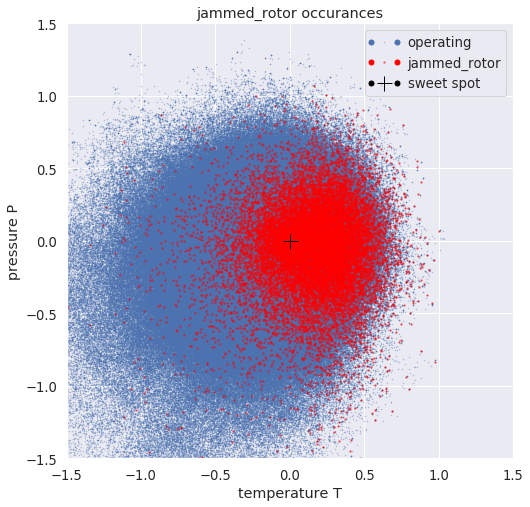

In [28]:
#jammed_rotor should occur where x~temp>>0.2
issue = 'jammed_rotor'
df = records
xp = df.temperature
yp = df.pressure
zp = df.load
fig, ax = plt.subplots(1,1, figsize=(8, 8))
p = ax.plot(xp, yp, marker='.', markersize=1, linestyle='none', alpha=0.4, label='operating')
idx = (df.issue == issue)
xp = df[idx].temperature
yp = df[idx].pressure
zp = df[idx].load
p = ax.plot(xp, yp, marker='.', markersize=3, linestyle='none', alpha=0.4, label=issue, color='red')
p = ax.plot(0, 0, marker='+', linestyle='none', markersize=15, color='black', mew=1, label='sweet spot')
p = ax.set_title(issue + ' occurances')
p = ax.set_xlabel(r'temperature T')
p = ax.set_ylabel(r'pressure P')
p = ax.set_xlim(-1.5, 1.5)
p = ax.set_ylim(-1.5, 1.5)
leg = ax.legend(numpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1.0)
    lh.set_linewidth(2.0)
    lh.set_marker('o')
    lh.set_markersize(5.0)
plt.savefig('figs/jammed_rotor_occurrance.png') 

In [29]:
#frequency of jammed_rotor events
df = records
idx = (records.issue == 'none')
x = df[idx].temperature
y = df[idx].pressure
bins = 25
rng = [[-1.75, 1.75], [-1.75, 1.75]]
operating_counts, xaxis, yaxis = np.histogram2d(x, y, bins=bins, range=rng)
operating_counts.shape, xaxis.shape, yaxis.shape
issue = 'jammed_rotor'
idx = (df.issue == issue)
x = df[idx].temperature
y = df[idx].pressure
issue_counts, xaxis, yaxis = np.histogram2d(x, y, bins=bins, range=rng)
issue_frequency = np.zeros_like(issue_counts)
idx = (operating_counts > 0.5)
issue_frequency[idx] = issue_counts[idx]/operating_counts[idx]
idx = (issue_frequency > 0.0)
issue_frequency_min = issue_frequency[idx].min()*0.5
issue_frequency[~idx] = issue_frequency_min
print issue_frequency.shape, xaxis.shape, yaxis.shape, issue_frequency.min(), issue_frequency.max()

(25, 25) (26,) (26,) 0.00015649452269170578 0.25


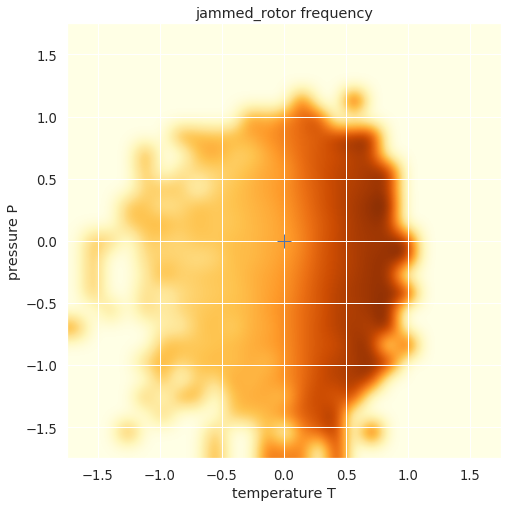

In [30]:
#jammed_rotor frequency map
fig, ax = plt.subplots(1,1, figsize=(8, 8))
extent = [rng[0][0], rng[0][1], rng[1][0], rng[1][1]]
import matplotlib.cm as cm
p = ax.imshow(np.log(issue_frequency.T), extent=extent, interpolation='bicubic', cmap='YlOrBr', origin='lower')
p = ax.plot(0, 0, marker='+', markersize=14, mew=1)
p = ax.set_title(issue + ' frequency')
p = ax.set_xlabel(r'temperature T')
p = ax.set_ylabel(r'pressure P')
plt.savefig('figs/jammed_rotor_density.png') 

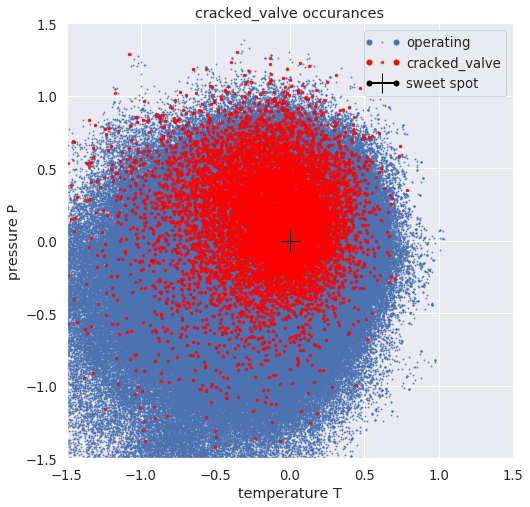

In [31]:
#cracked_valve should occur where y~pressure>>0.2
issue = 'cracked_valve'
df = records
xp = df.temperature
yp = df.pressure
zp = df.load
fig, ax = plt.subplots(1,1, figsize=(8, 8))
p = ax.plot(xp, yp, marker='.', markersize=2, linestyle='none', alpha=0.7, label='operating')
idx = (df.issue == issue)
xp = df[idx].temperature
yp = df[idx].pressure
zp = df[idx].load
p = ax.plot(xp, yp, marker='.', markersize=5, linestyle='none', alpha=0.7, label=issue, color='red')
p = ax.plot(0, 0, marker='+', markersize=20, color='black', mew=1, label='sweet spot')
p = ax.set_title(issue + ' occurances')
p = ax.set_xlabel(r'temperature T')
p = ax.set_ylabel(r'pressure P')
p = ax.set_xlim(-1.5, 1.5)
p = ax.set_ylim(-1.5, 1.5)
leg = ax.legend(numpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1.0)
    lh.set_linewidth(2.0)
    lh.set_marker('o')
    lh.set_markersize(5.0)

In [32]:
#frequency of cracked_valve events
df = records
idx = (records.issue == 'none')
x = df[idx].temperature
y = df[idx].pressure
bins = 25
rng = [[-1.75, 1.75], [-1.75, 1.75]]
operating_counts, xaxis, yaxis = np.histogram2d(x, y, bins=bins, range=rng)
operating_counts.shape, xaxis.shape, yaxis.shape
issue = 'cracked_valve'
idx = (df.issue == issue)
x = df[idx].temperature
y = df[idx].pressure
issue_counts, xaxis, yaxis = np.histogram2d(x, y, bins=bins, range=rng)
issue_frequency = np.zeros_like(issue_counts)
idx = (operating_counts > 0.5)
issue_frequency[idx] = issue_counts[idx]/operating_counts[idx]
idx = (issue_frequency > 0.0)
issue_frequency_min = issue_frequency[idx].min()*0.5
issue_frequency[~idx] = issue_frequency_min
print issue_frequency.shape, xaxis.shape, yaxis.shape, issue_frequency.min(), issue_frequency.max()

(25, 25) (26,) (26,) 0.00020807324178110696 0.2222222222222222


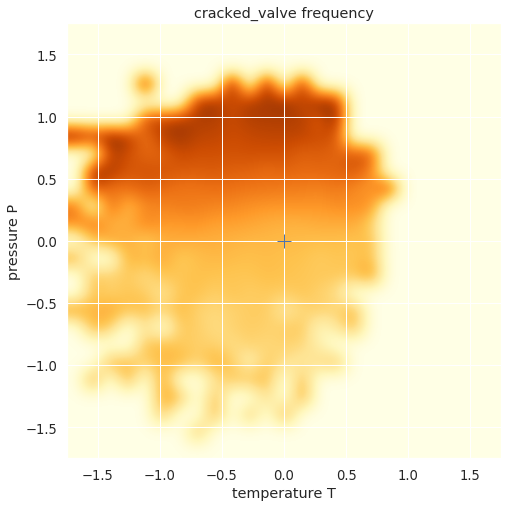

In [33]:
#cracked_valve frequency map
fig, ax = plt.subplots(1,1, figsize=(8, 8))
extent = [rng[0][0], rng[0][1], rng[1][0], rng[1][1]]
import matplotlib.cm as cm
p = ax.imshow(np.log(issue_frequency).T, extent=extent, interpolation='bicubic', cmap='YlOrBr', origin='lower')
p = ax.plot(0, 0, marker='+', markersize=14, mew=1)
p = ax.set_title(issue + ' frequency')
p = ax.set_xlabel(r'temperature T')
p = ax.set_ylabel(r'pressure P')

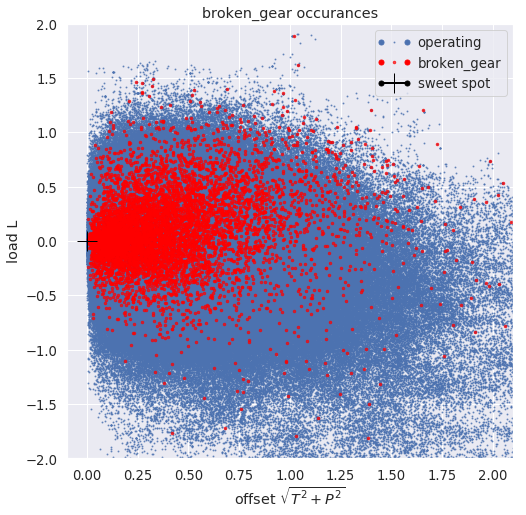

In [34]:
#broken_gear should occur where rho=sqrt(temp**2 + pressure**2)>>0.2 AND z~load>0
issue = 'broken_gear'
df = records
xp = df.temperature
yp = df.pressure
zp = df.load
rho = np.sqrt(xp**2 + yp**2)
fig, ax = plt.subplots(1,1, figsize=(8, 8))
p = ax.plot(rho, zp, marker='.', markersize=2, linestyle='none', alpha=0.7, label='operating')
idx = (df.issue == issue)
xp = df[idx].temperature
yp = df[idx].pressure
zp = df[idx].load
rho = np.sqrt(xp**2 + yp**2)
p = ax.plot(rho, zp, marker='.', markersize=5, linestyle='none', alpha=0.7, label=issue, color='red')
p = ax.plot(0, 0, marker='+', markersize=20, color='black', mew=1, label='sweet spot')
p = ax.set_title(issue + ' occurances')
p = ax.set_xlabel(r'offset $\sqrt{T^2 + P^2}$')
p = ax.set_ylabel(r'load L')
p = ax.set_xlim(-0.1, 2.1)
p = ax.set_ylim(-2.0, 2.0)
leg = ax.legend(numpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1.0)
    lh.set_linewidth(2.0)
    lh.set_marker('o')
    lh.set_markersize(5.0)

In [35]:
 #frequency of broken_gear events
df = records
idx = (records.issue == 'none')
x = df[idx].temperature
y = df[idx].pressure
z = df[idx].load
rho = np.sqrt(x**2 + y**2)
bins = 31
rng = [[-0.1, 2.5], [-0.5, 2.1]]
operating_counts, xaxis, yaxis = np.histogram2d(rho, z, bins=bins, range=rng)
operating_counts.shape, xaxis.shape, yaxis.shape
issue = 'broken_gear'
idx = (df.issue == issue)
x = df[idx].temperature
y = df[idx].pressure
z = df[idx].load
rho = np.sqrt(x**2 + y**2)
issue_counts, xaxis, yaxis = np.histogram2d(rho, z, bins=bins, range=rng)
issue_frequency = np.zeros_like(issue_counts)
idx = (operating_counts > 0.5)
issue_frequency[idx] = issue_counts[idx]/operating_counts[idx]
idx = (issue_frequency > 0.0)
issue_frequency_min = issue_frequency[idx].min()*0.5
issue_frequency[~idx] = issue_frequency_min
print issue_frequency.shape, xaxis.shape, yaxis.shape, issue_frequency.min(), issue_frequency.max()

(31, 31) (32,) (32,) 0.0002763957987838585 0.25


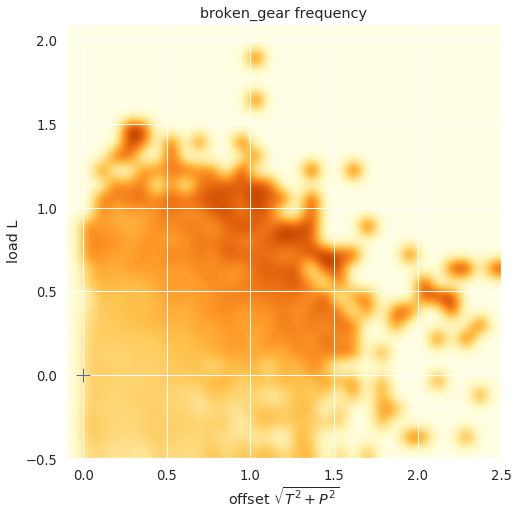

In [36]:
#broken_gear frequency map
fig, ax = plt.subplots(1,1, figsize=(8, 8))
extent = [rng[0][0], rng[0][1], rng[1][0], rng[1][1]]
import matplotlib.cm as cm
p = ax.imshow(np.log(issue_frequency).T, extent=extent, interpolation='bicubic', cmap='YlOrBr', origin='lower')
p = ax.plot(0, 0, marker='+', markersize=14, mew=1)
p = ax.set_title(issue + ' frequency')
p = ax.set_xlabel(r'offset $\sqrt{T^2 + P^2}$')
p = ax.set_ylabel(r'load L')